<img align="right" style="max-width: 200px; height: auto" src="cfds_logo.png">

###  Lab 05 - "Supervised Machine Learning - k Nearest Neighbor Classification"

Chartered Financial Data Scientist (CFDS), Autumn Term 2020

In the last lab, you got your hands dirty with supervised learning by using the Gaussian Naive-Bayes (GNB) classifier. You learned how to train a model and to evaluate and interpret its results. In this lab, we will look at another popular algorithm, namely the **k Nearest-Neighbors (kNN)** classifier.

The *discriminative* **k Nearest-Neighbors (kNN)** classifier is a simple, easy to understand, versatile, but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches) it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition, e.g. in credit ratings, financial institutes used kNN to predict the solvency of customers.

This classification technique is part of the **discriminative** type of classifiers, which can be distinguished from the **generative** type as shown in the following illustration:

<img align="center" style="max-width: 600px; height: auto" src="supervisedlearning.png">

(Inspired by: 'Machine Learning - A Probabilistic Perspective', Kevin P. Murphy)

As always, pls. don't hesitate to ask all your questions either during the lab, post them in our NextThought lab discussion forum (https://financial-data-science.nextthought.io), or send us an email (using our fds.ai email addresses).

### Lab Objectives:

After today's lab you should be able to:

> 1. Know how to setup a **notebook or "pipeline"** that solves a simple supervised classification task.
> 2. Recognize the distinct **data elements** (features and labels) needed to train and evaluate a supervised machine learning classifier. 
> 3. Understand how a Gaussian **k Nearest-Neighbor (kNN)** classifier can be trained and evaluated.
> 4. Know how to use Python's sklearn library to **train** and **evaluate** arbitrary classifiers.
> 5. Understand how to **evaluate** and **interpret** the classification results.

Before we start let's watch a motivational video:

In [1]:
from IPython.display import YouTubeVideo
# Microsoft: "AI for Health Program"
# YouTubeVideo('ii-FfE-7C-k', width=800, height=600)

### Setup of the Analysis Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [2]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline Jupyter notebook plotting:

In [3]:
%matplotlib inline

Use the 'Seaborn' plotting style in all subsequent visualizations:

In [4]:
plt.style.use('seaborn')

Set random seed of all our experiments - this insures reproducibility.

In [5]:
random_seed = 42

## 1. k Nearest-Neighbor (kNN) Classification

Now, let's have closer look into the non-parametric method used for supervised classification tasks, referred to as the the **k Nearest-Neighbors (kNN)** algorithm. As you learned during the in lecture k-NN classification, the output of the classifier is a class membership. 

Prior to running **k Nearest-Neighbor (kNN)** classification let's briefly revisit the distinct steps of the algorithm as discussed in the lecture:
<img align="center" style="max-width: 700px; height: auto" src="knn.png">

(Courtesy: Intro to AI & ML lecture, Prof. Dr. Borth, University of St. Gallen)

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### 1.1. Dataset Download and Data Assessment

Let's try the k Nearest-Neighbour algorithm using the delicious **Wine Dataset**! It is a classic and straightforward multi-class classification dataset.

<img align="center" style="max-width: 600px; height: auto" src="wine_dataset.jpg">

(Source: https://www.empirewine.com)

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists in total of **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine. Please, find below the list of the individual measurements (features):

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`

Further details on the dataset can be obtained from the following puplication: *Forina, M. et al, PARVUS - "An Extendible Package for Data Exploration, Classification and Correlation.", Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.*

Let's load the dataset and conduct a preliminary data assessment: 

In [6]:
wine = datasets.load_wine()

Print and inspect feature names of the dataset:

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print and inspect the class names of the dataset:

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Print and inspect the top 10 feature rows of the dataset:

In [9]:
pd.DataFrame(wine.data, columns=wine.feature_names).head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

Print and inspect the top 10 labels of the dataset:

In [10]:
pd.DataFrame(wine.target).head(10)

0
0  0
1  0
2  0
3  0
4  0
5  0
6  0
7  0
8  0
9  0

Determine and print the feature dimensionality of the dataset:

In [11]:
wine.data.shape

(178, 13)

Determine and print the label dimensionality of the dataset:

In [12]:
wine.target.shape

(178,)

Plot the data distributions of the distinct features:

<Figure size 720x720 with 0 Axes>

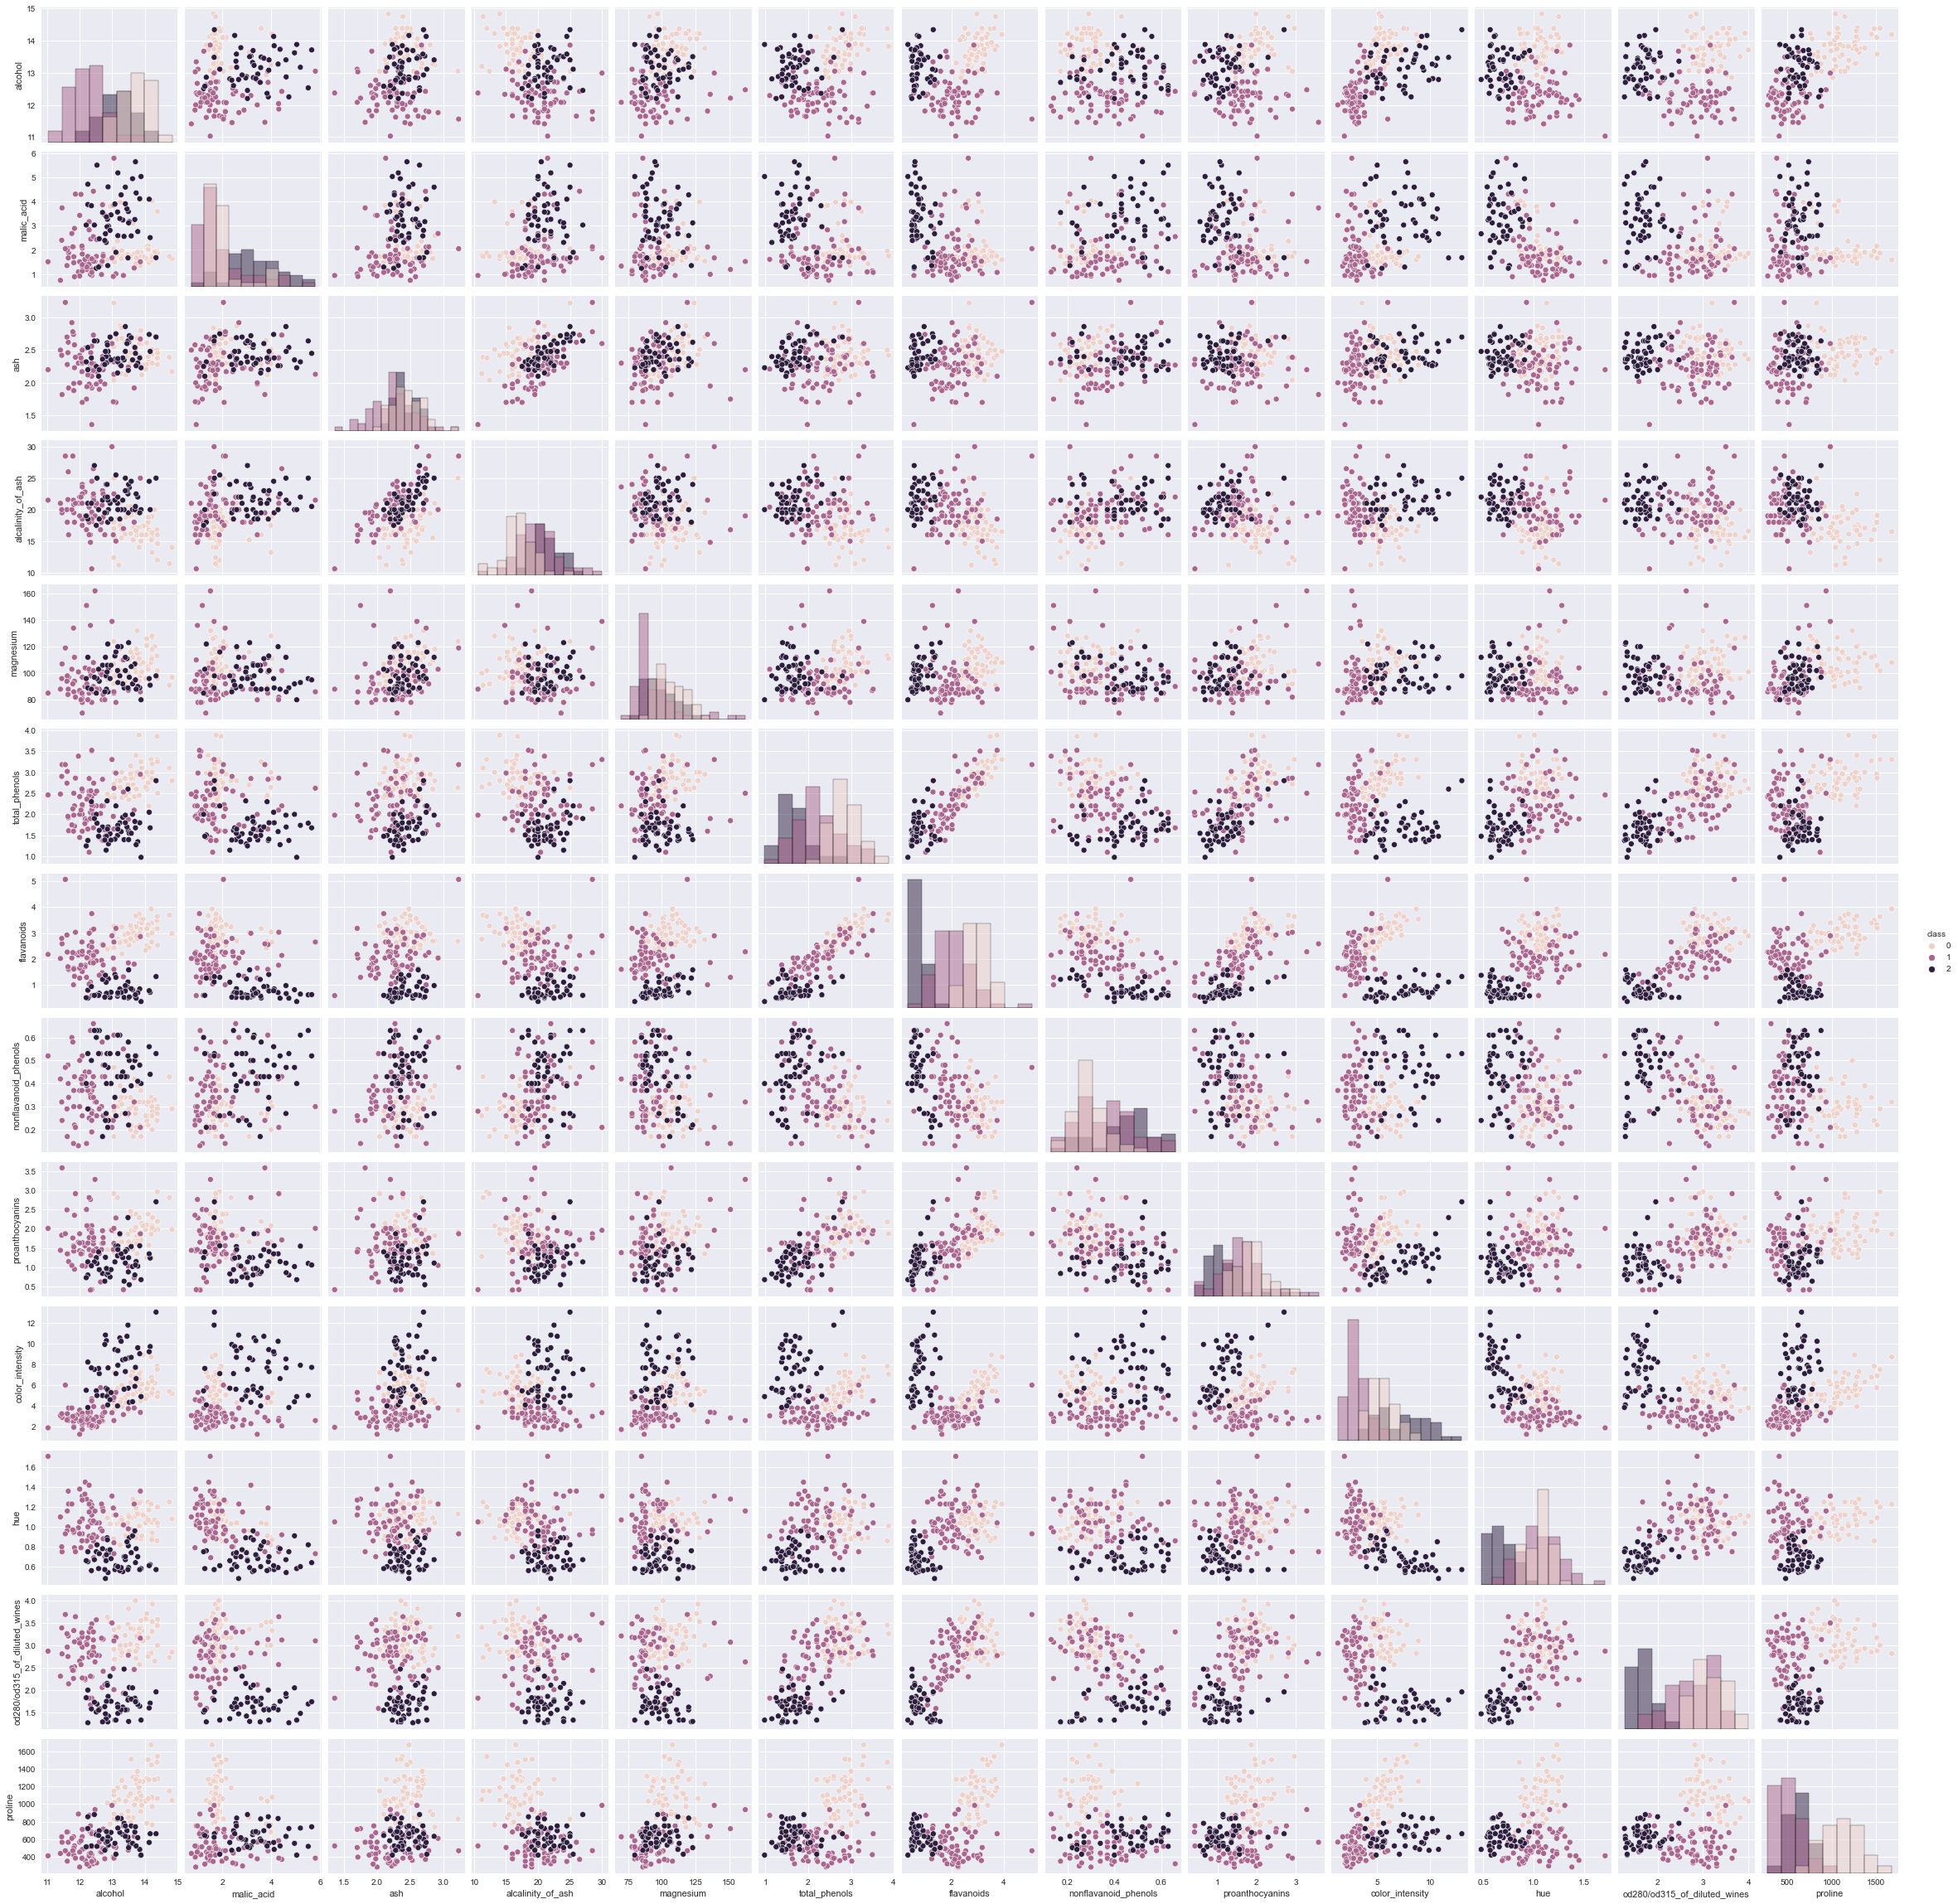

In [13]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
wine_plot = pd.DataFrame(wine.data, columns=wine.feature_names)

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

### 1.2. Dataset Pre-Processing

#### 1.2.1. Feature Re-Scaling

Observing the features values of the **Wine Dataset** we will notice that their respective value ranges vary widely. This results in a major challenge for distance based machine learning algorithms such as the **k Nearest-Neighbor** classifier. The **k Nearest-Neighbour** classifier calculates the distance between two observations using a distance measure such as the **Euclidean** or **Manhattan** distance.

If one of the features exhibits a wide range of values, the calculated distance will be governed by this particular feature. Therefore, the range of all features needs to be **re-scaled** or **normalized** to a value range beween in $[0,1]$ or $[-1,1]$ so that each feature contributes approximately proportionately to the final distance. 

One widley used method of feature re-scaling is referred to as **Min-Max Normalization** and is given by:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Let's re-scale the distinct feature values of the **Wine Dataset** using **Min-Max Normalization** using the `MinMaxScaler` class of the `sklearn` library:

In [14]:
# init the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# min-max normalize the distinct feature values
wine_data_norm = scaler.fit_transform(wine.data)

Print and inspect the top 10 feature rows of the normalized dataset:

In [15]:
pd.DataFrame(wine_data_norm, columns=wine.feature_names).head(10)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   
5  0.834211    0.201581  0.582888           0.237113   0.456522   
6  0.884211    0.223320  0.582888           0.206186   0.282609   
7  0.797368    0.278656  0.668449           0.360825   0.554348   
8  1.000000    0.177866  0.433155           0.175258   0.293478   
9  0.744737    0.120553  0.486631           0.278351   0.304348   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   
5       0.789655    0.643460              0.396226         0.492114   
6       0.524138    0.459916              0.320755         0.495268   
7       0.558621    0.457806              0.339623         0.264984   
8       0.627586    0.556962              0.301887         0.495268   
9       0.689655    0.592827              0.169811         0.454259   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415                      0.780220  0.550642  
2         0.375427  0.447154                      0.695971  0.646933  
3         0.556314  0.308943                      0.798535  0.857347  
4         0.259386  0.455285                      0.608059  0.325963  
5         0.466724  0.463415                      0.578755  0.835949  
6         0.338737  0.439024                      0.846154  0.721826  
7         0.321672  0.471545                      0.846154  0.725392  
8         0.334471  0.487805                      0.578755  0.547076  
9         0.506826  0.430894                      0.835165  0.547076

Ok, we can observe that all features values have been re-scaled. Let's also statistically validate this observation and determine if all feature values have been re-scaled to a value range between in $[0,1]$:

In [16]:
pd.DataFrame(wine_data_norm, columns=wine.feature_names).describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.000000    0.000000              0.000000         0.000000   
25%         0.262931    0.182489              0.264151         0.264984   
50%         0.474138    0.378692              0.396226         0.361199   
75%         0.627586    0.534810              0.580189         0.485804   
max         1.000000    1.000000              1.000000         1.000000   

       color_intensity         hue  od280/od315_of_diluted_wines     proline  
count       178.000000  178.000000                    178.000000  178.000000  
mean          0.322363    0.388170                      0.491460    0.334446  
std           0.197806    0.185831                      0.260070    0.224613  
min           0.000000    0.000000                      0.000000    0.000000  
25%           0.165529    0.245935                      0.244505    0.158702  
50%           0.290956    0.394309                      0.553114    0.282097  
75%           0.419795    0.520325                      0.695971    0.504280  
max           1.000000    1.000000                      1.000000    1.000000

Looks great. All feature values are indeed in a range between $[0,1]$. Let's also visualize the re-scaled feature values and inspect their distributions:

<Figure size 720x720 with 0 Axes>

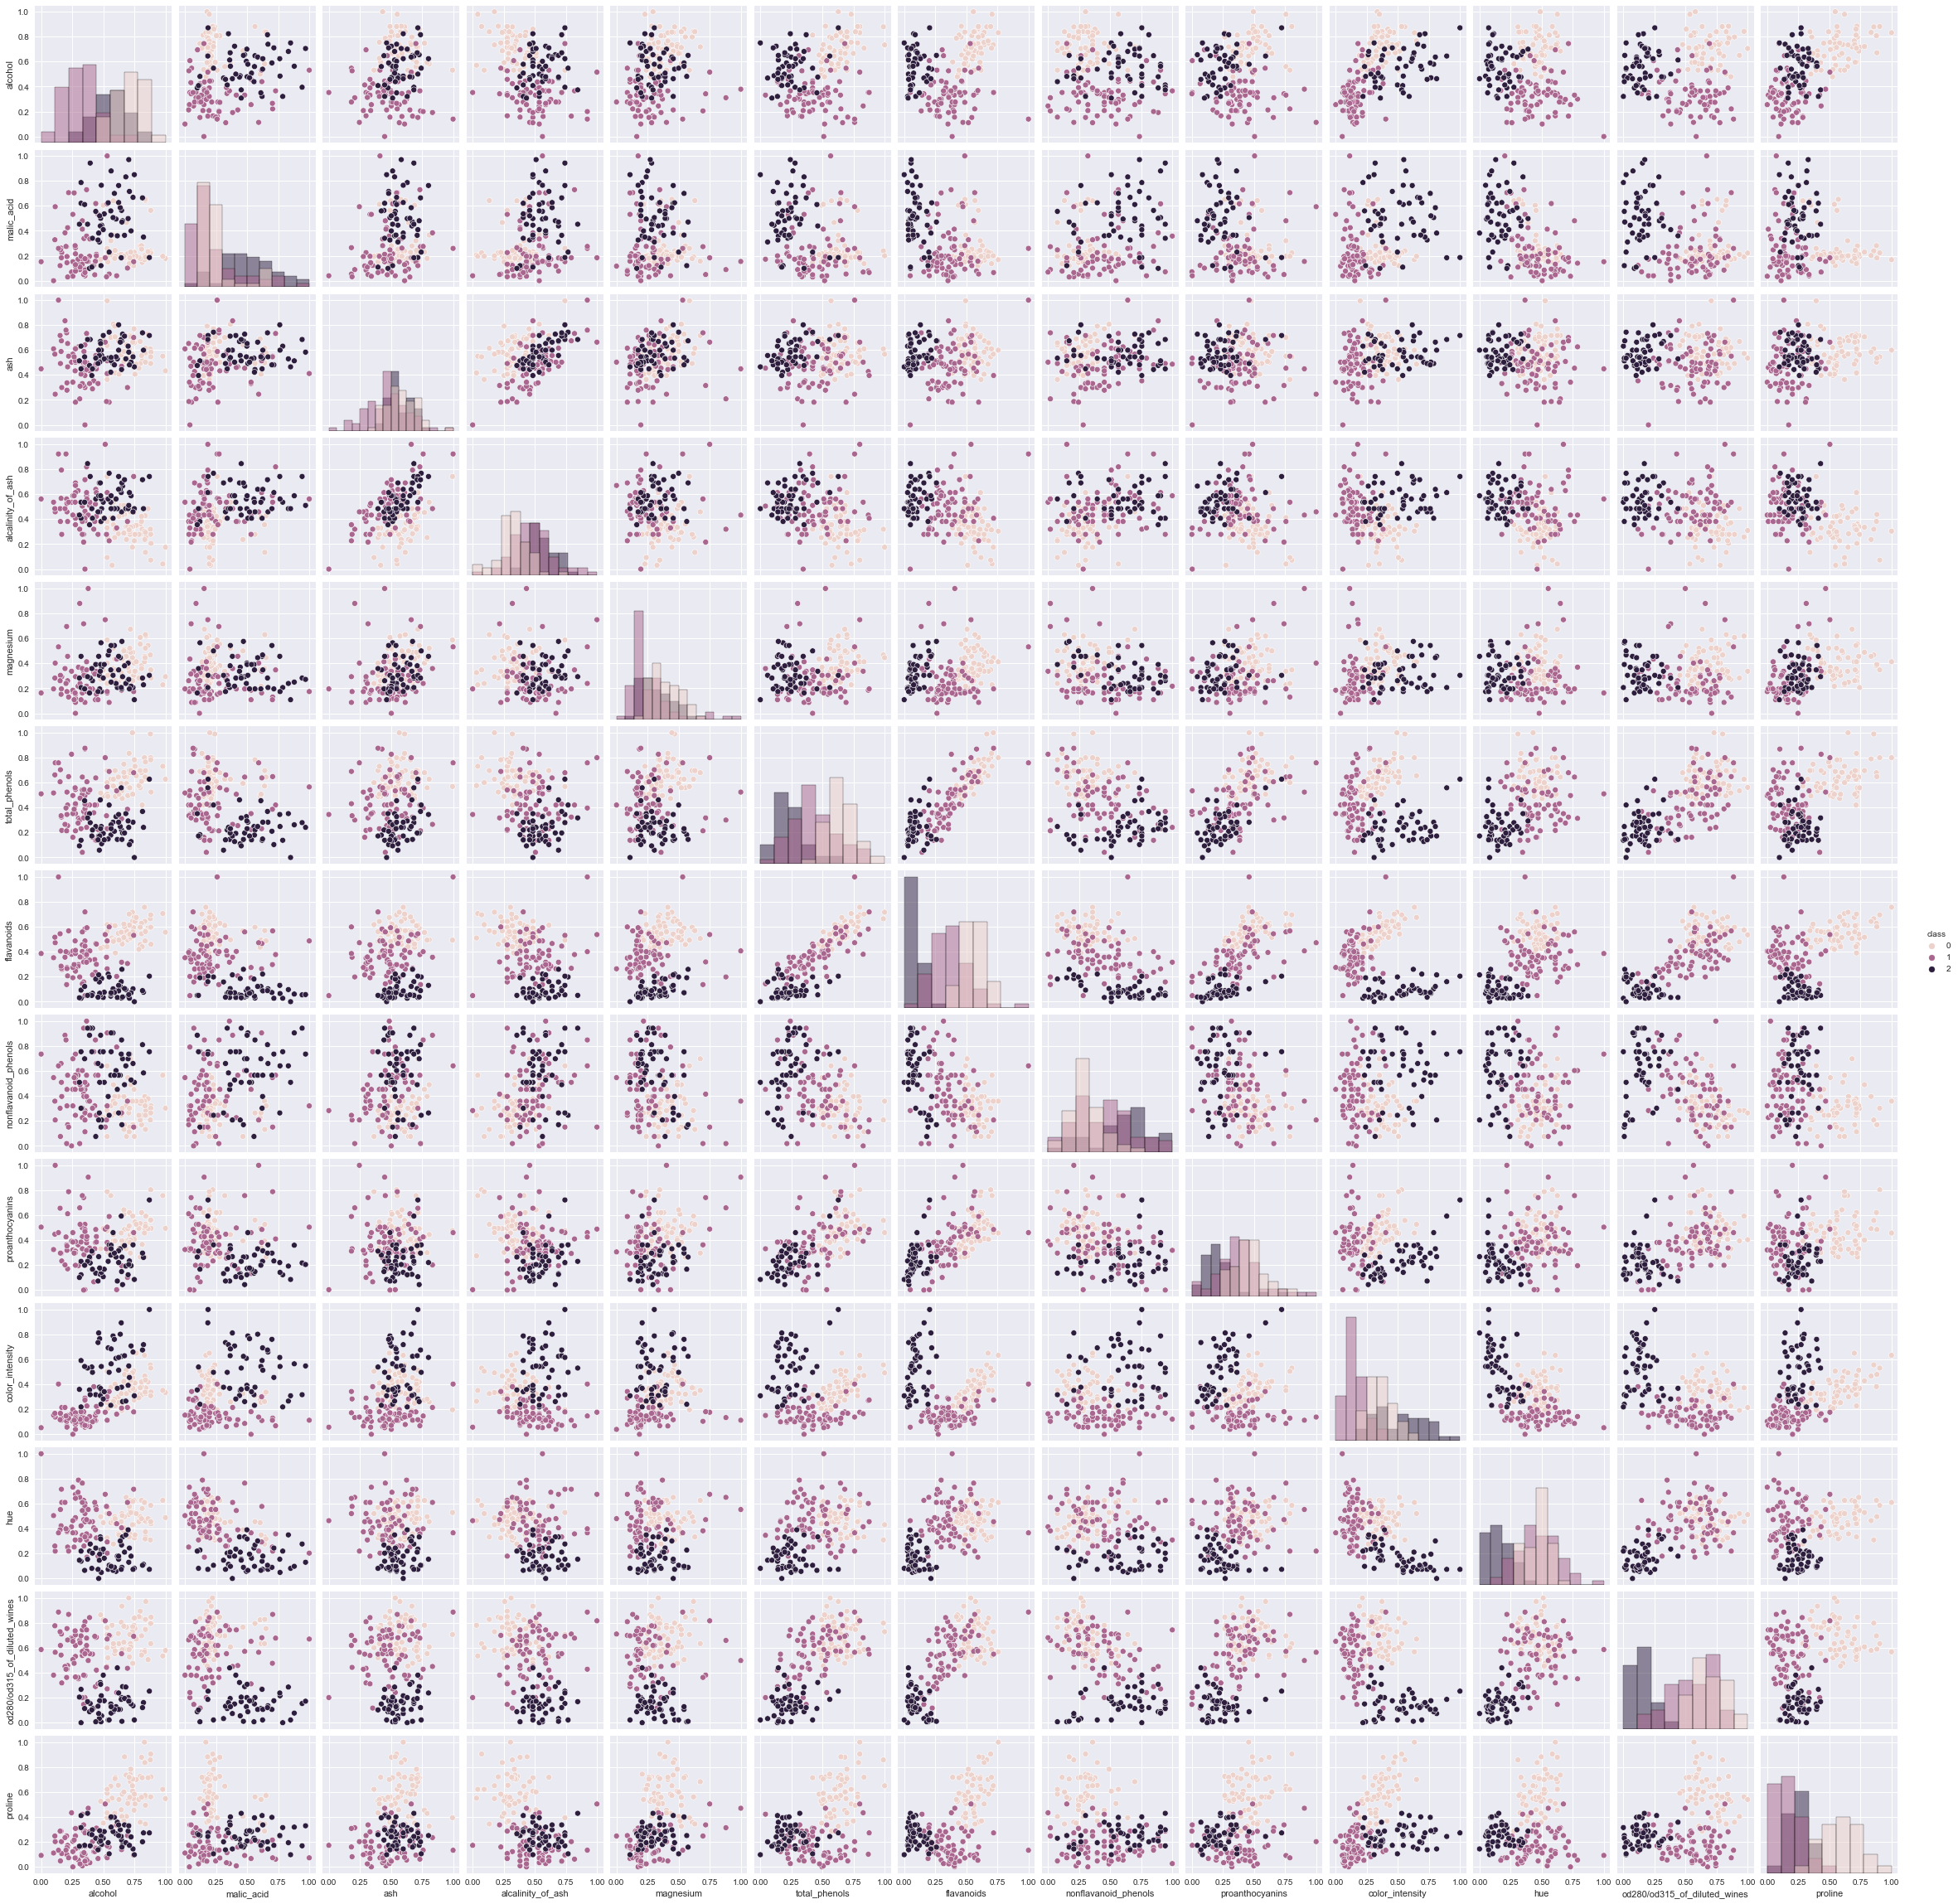

In [17]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
wine_plot = pd.DataFrame(wine_data_norm, columns=wine.feature_names)

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

Excellent, the characteristics of the distinct feature value distributions remained unchanged.

#### 1.2.2. Extraction of Training- and Evaluation-Dataset

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Please note, the **evaluation set** will never be shown to the model as part of the training process. All of this is exactly what we did in the prior **Gaussian Naive-Bayes** lab.

<img align="center" style="max-width: 500px; height: auto" src="trainevaldataset.png">

We set the fraction of testing records to **30%** of the original dataset:

In [18]:
eval_fraction = 0.3

Randomly split the **Wine Dataset** into training set and evaluation set using sklearn's `train_test_split` function:

In [19]:
# 70% training and 30% evaluation
X_train, X_eval, y_train, y_eval = train_test_split(wine_data_norm, wine.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the training set dimensionality:

In [20]:
X_train.shape, y_train.shape

((124, 13), (124,))

Evaluate the evaluation set dimensionality:

In [21]:
X_eval.shape, y_eval.shape

((54, 13), (54,))

### 1.3. k Nearest-Neighbor (kNN) Classification

#### 1.3.1. Nearest Neighbors Classification, k=4

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [22]:
k_nearest_neighbors = 4

Please, recall that we discussed two distinct distance measures in the lecture to calculate the distance between an observation $x$ and it's $k$-nearest-neighbors $x'_{j}$ in a $n$-dimensonal feature space:

**Manhattan distance ("L1-norm"):** $$ D(x, x')=\|\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})\|$$

**Euclidian distance ("L2-norm"):** $$ D(x, x')=\sqrt{\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})^2}$$

where the index $j$ denotes the number of $k$-nearest-neighbors and the index $i$ denotes the $i$-th feature of a single nearest neighbor $x_j$. Since the 13 features of the Wine dataset consist of continuous features we will use the Euclidean distance as the distance metric in our kNN classification:

In [23]:
distance_metric = 'euclidean'

Init the **kNN classifier** of Python's `Scikit-Learn` library of data science algorithms: 

In [24]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [25]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [26]:
y_pred = knn.predict(X_eval)

Let's have a look at the predicted class labels:

In [27]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

As well as the true class labels:

In [28]:
y_eval

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [29]:
print("Accuracy, k=4: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=4:  0.9629629629629629


Determine and plot the **confusion matrix** of the individual predictions:

In [30]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=4 Nearest-Neighbor** classifier:

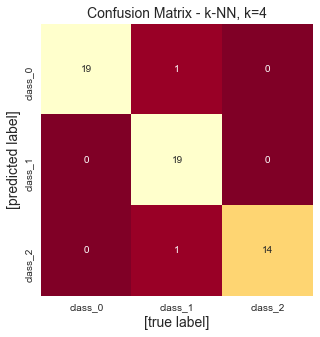

In [31]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=4', fontsize=14);

Remember that as part of the lecture you learned about several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [32]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



#### 1.3.2. Nearest Neighbors Classification, k=8

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [33]:
k_nearest_neighbors = 8

Init the **k-NN classifier** of Python's `sklearn` libary of data science algoritms: 

In [34]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [35]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [36]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [37]:
print("Accuracy, k=8: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=8:  0.9629629629629629


Determine and plot the **confusion matrix** of the individual predictions:

In [38]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=8 Nearest-Neighbor** classifier:

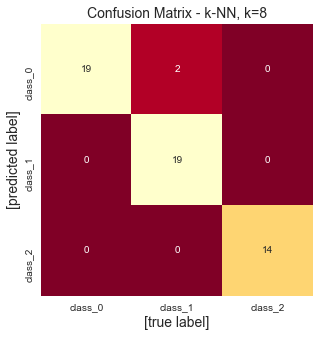

In [39]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=8', fontsize=14);

Determine and plot a comprehensive **classification report** of the individual predictions:

In [40]:
# collect classification report
report = classification_report(y_eval, y_pred)

# print classification report
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



#### 1.3.3. Finding the optimal k of the kNN classifier

Until now we have investigated the Euclidean distance based kNN classifer for two distinct values of $k=4$ and $k=8$. However the question remains: can we locate a value for k that yields an even higher classification accuracy? 

Let's therefore investigate the classification performance of a wider range of distinct $k$ values and in particular compare the corresponding classification accuracy. We will do so in the following by specifying a range of distinct $k$ values ranging from $k=1, ..., 50$:

In [41]:
# try k=1 through k=50 to be evaluated
k_range = range(1, 51)

To run the kNN classification experiments for different values of $k$ we will define a python loop. The loop iterates over the range of distinct k's and conducts the model training (using the training data) and evaluation (using the evaluation data). The classification accuracy for each $k$ value will be collected and stored in a designated list of accuracy scores: 

In [42]:
# init the distinct accuracy scores obtained on the evaluation data
eval_accuracy_scores = []

# iterate over the distinct k values
for k in k_range:
    
    # init the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # train the k-NN classifer on the training data
    knn.fit(X_train, y_train)
    
    # evaluate the k-NN classifier on the training data
    y_train_pred = knn.predict(X_train)
    
    # evaluate the k-NN classifier on the evaluation data
    y_eval_pred = knn.predict(X_eval)
    
    # determine classification accuracy
    accuracy = metrics.accuracy_score(y_eval, y_eval_pred)
    
    # collect the classification accuracy of the current k on the evaluation data
    eval_accuracy_scores.append(accuracy)

Visualizing the collected classification accuracy scores of the distinct $k$ values:

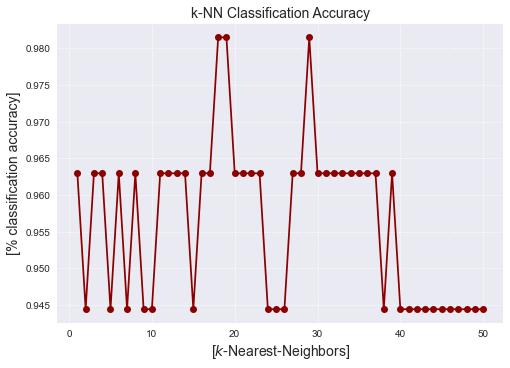

In [43]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the classification accuracy of distinct k's
ax.plot(range(1, len(eval_accuracy_scores)+1), eval_accuracy_scores, color='darkred', marker='o')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("[$k$-Nearest-Neighbors]", fontsize=14)
ax.set_ylabel("[% classification accuracy]", fontsize=14)

# add plot title
ax.set_title('k-NN Classification Accuracy', fontsize=14);

Alright, we can nicely observe that a constant high classification accuracy on the held out evaluation dataset can be achieved for $k=19, 23,$ and $29$. This is probably the $k$ value that you may want to use for inferencing and rolling to model out to production.

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k?

In [44]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models without re-scaling the individual feature values.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k? What do you observe when comparing the results of the non re-scaled with the results obtained for the scaled features?

In [45]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**3. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models using the "Manhattan" distance.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40 using the "Manhattan" instead of the "Euclidian" distance metric. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k? What do you observe when comparing the results obtained for the "Manhattan" distance with the ones obtained for the "Euclidean" distance?

In [46]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

### Lab Summary:

In this lab, a step by step introduction into **k Nearest-Neighbor (kNN)** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [47]:
# installing the nbconvert library
!pip install nbconvert
!pip install jupyter_contrib_nbextensions

/bin/bash: pip: command not found
/bin/bash: pip: command not found


Let's now convert the Jupyter notebook into a plain Python script:

In [48]:
!jupyter nbconvert --to script cfds_lab_05b.ipynb

[NbConvertApp] Converting notebook cfds_lab_05b.ipynb to script
[NbConvertApp] Writing 22050 bytes to cfds_lab_05b.py
